Sample records:
     MODELYEAR     MAKE            MODEL             VEHICLECLASS  ENGINESIZE  \
429       2014     FORD  TRANSIT CONNECT  SPECIAL PURPOSE VEHICLE         2.5   
565       2014   JAGUAR  XKR CONVERTIBLE              MINICOMPACT         5.0   
981       2014   TOYOTA   FJ CRUISER 4WD              SUV - SMALL         4.0   
680       2014  LINCOLN       MKT LIVERY  SPECIAL PURPOSE VEHICLE         2.0   
480       2014      GMC     YUKON XL 4WD           SUV - STANDARD         5.3   

     CYLINDERS TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  \
429          4          AS6        X                  11.3   
565          8          AS6        Z                  15.9   
981          6           M6        X                  15.4   
680          4          AS6        X                  11.5   
480          8           A6        E                  21.5   

     FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
429                  8.2                   9.9  

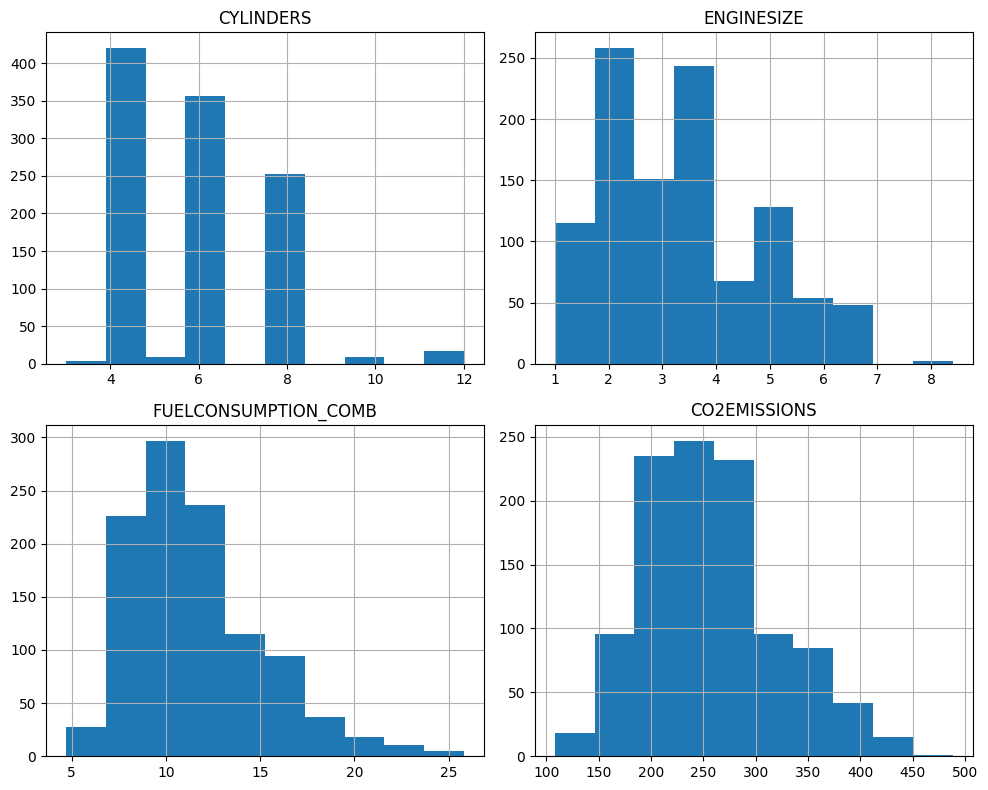

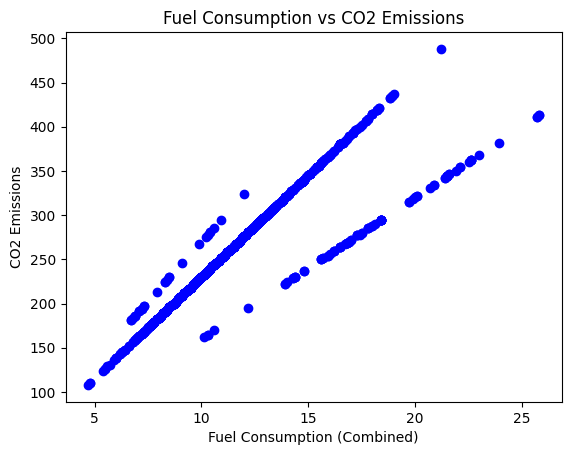

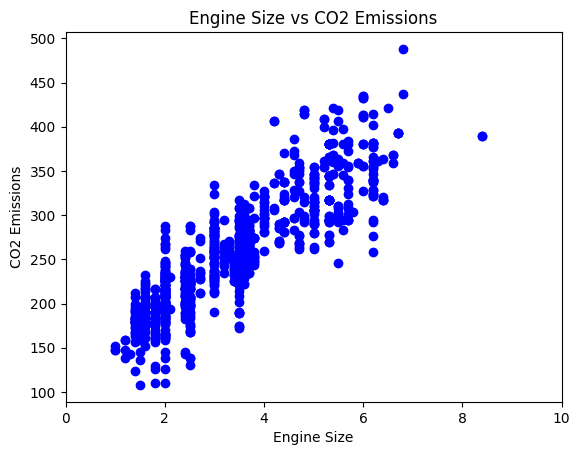

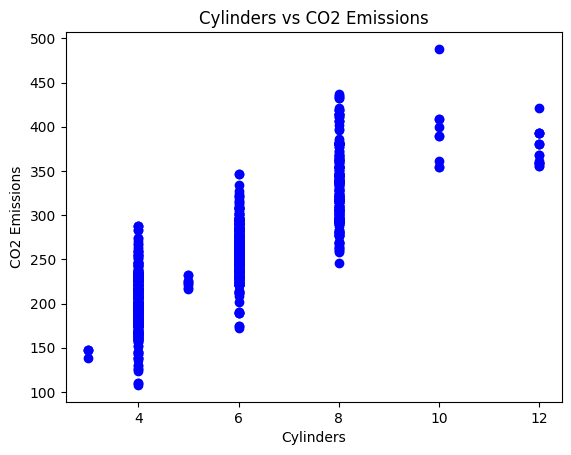


Shapes of training and test sets:
X_train: (853, 1)
X_test: (214, 1)

Model coefficients:
Coefficient: 38.992978724434074
Intercept: 126.28970217408721


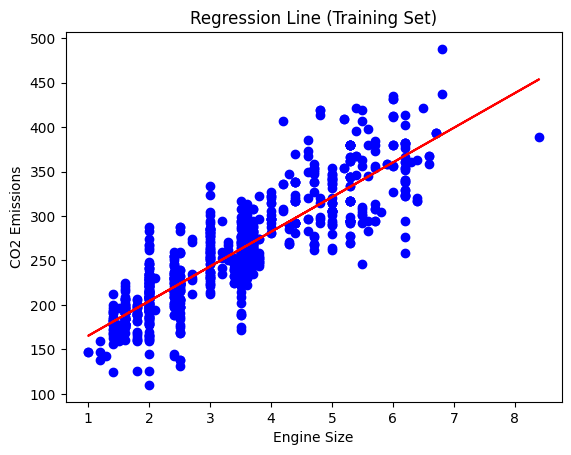


Model evaluation (Engine Size):
Mean Absolute Error: 24.10
Mean Squared Error: 985.94
Root Mean Squared Error: 31.40
R2-score: 0.76


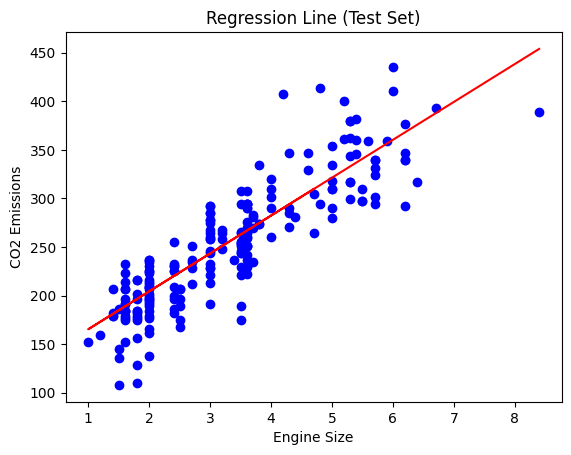


Model evaluation (Fuel Consumption Combined):
Mean Squared Error: 797.43


In [1]:
# ----------------------------------------
# 1. Import Required Libraries
# ----------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# For Jupyter Notebook: display plots inline
%matplotlib inline

# ----------------------------------------
# 2. Load Dataset
# ----------------------------------------
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)

# ----------------------------------------
# 3. Explore Dataset
# ----------------------------------------
print("Sample records:")
print(df.sample(5))

print("\nDataset statistical summary:")
print(df.describe())

# ----------------------------------------
# 4. Feature Selection
# ----------------------------------------
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
print("\nSample of selected features:")
print(cdf.sample(9))

# ----------------------------------------
# 5. Data Visualization
# ----------------------------------------

# Histograms
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Scatter plots
plt.figure()
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Fuel Consumption (Combined)")
plt.ylabel("CO2 Emissions")
plt.title("Fuel Consumption vs CO2 Emissions")
plt.show()

plt.figure()
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("Engine Size vs CO2 Emissions")
plt.xlim(0, 10)
plt.show()

plt.figure()
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions")
plt.title("Cylinders vs CO2 Emissions")
plt.show()

# ----------------------------------------
# 6. Prepare Data for Modeling (Engine Size)
# ----------------------------------------
X = cdf['ENGINESIZE'].to_numpy().reshape(-1, 1)
y = cdf['CO2EMISSIONS'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShapes of training and test sets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

# ----------------------------------------
# 7. Train Linear Regression Model (Engine Size)
# ----------------------------------------
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

print("\nModel coefficients:")
print('Coefficient:', regressor.coef_[0])
print('Intercept:', regressor.intercept_)

# Plot regression line with training data
plt.figure()
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("Regression Line (Training Set)")
plt.show()

# ----------------------------------------
# 8. Evaluate Model (Engine Size)
# ----------------------------------------
y_pred_test = regressor.predict(X_test)

print("\nModel evaluation (Engine Size):")
print("Mean Absolute Error: %.2f" % mean_absolute_error(y_test, y_pred_test))
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error: %.2f" % root_mean_squared_error(y_test, y_pred_test))
print("R2-score: %.2f" % r2_score(y_test, y_pred_test))

# Plot regression line with test data
plt.figure()
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred_test, color='red')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("Regression Line (Test Set)")
plt.show()

# ----------------------------------------
# 9. Second Model: Using FUELCONSUMPTION_COMB
# ----------------------------------------
X = cdf['FUELCONSUMPTION_COMB'].to_numpy().reshape(-1, 1)
y = cdf['CO2EMISSIONS'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred_test = regr.predict(X_test)

print("\nModel evaluation (Fuel Consumption Combined):")
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred_test))
